# Real Life Example

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Loading Raw data

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variable

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# If you are removing <5% of the observations, you are free to just remove all that have Missing Values

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Removing Outliers

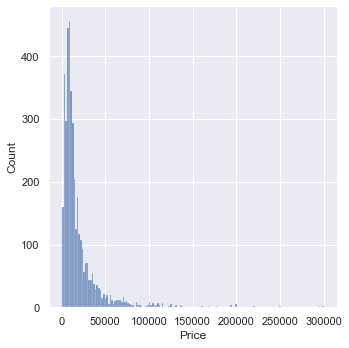

In [10]:
# Identifying Distribution
# Price
sns.displot(data_no_mv['Price'])

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


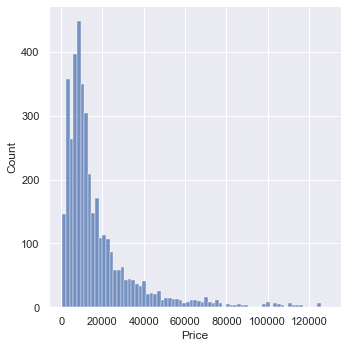

In [12]:
sns.displot(data_1['Price'])
# Still not normal distribution

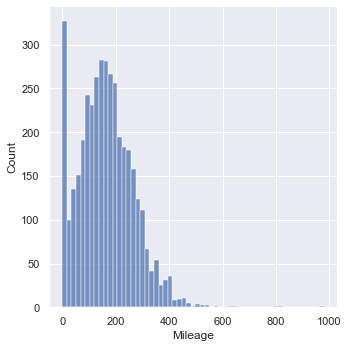

In [13]:
# Mileage
sns.displot(data_1['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


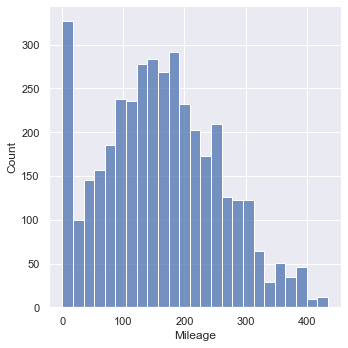

In [15]:
sns.displot(data_2['Mileage'])

In [16]:
# Engine Volume
# To deal with engine volume, we get rid of wrong entries. The max engine volume is 6.5
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


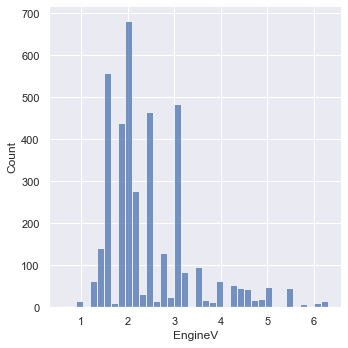

In [17]:
sns.displot(data_3['EngineV'])

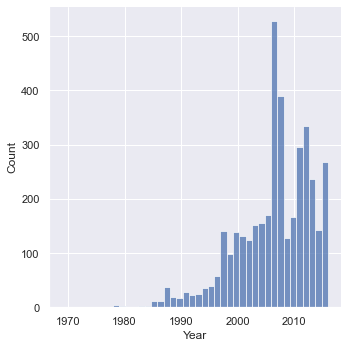

In [18]:
#Year
sns.displot(data_3['Year'])

In [19]:
# Removing first 1 percentile of the value
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

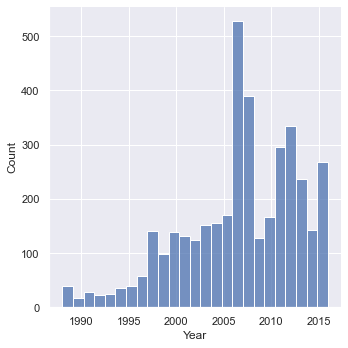

In [20]:
sns.displot(data_4['Year'])

In [21]:
# dropping the indexes of unuseful data
data_cleaned = data_4.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

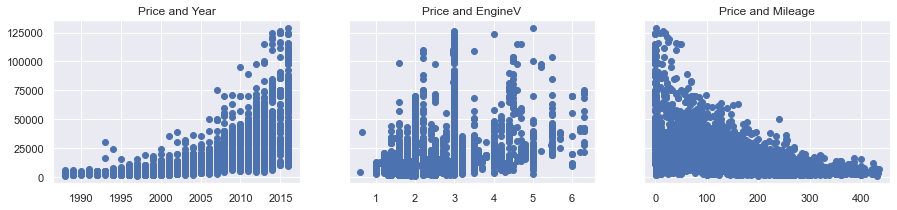

In [23]:
# Linearity
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [24]:
# Looking at the scatter plot it is not linear
# Transform one or more variable (log transformation is useful in this case)

### Relaxing the assumptions

In [25]:
log_price = np.log(data_cleaned['Price'])

In [26]:
data_cleaned['log_price'] = log_price

In [27]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


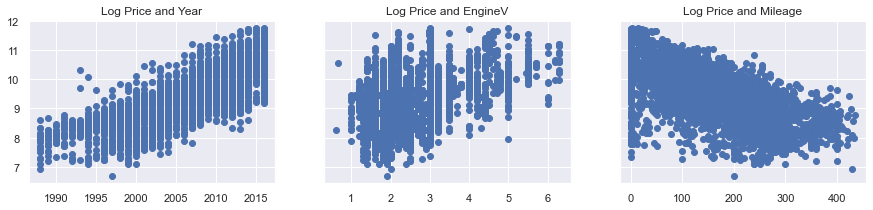

In [28]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [29]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
# Linearity is passed

In [30]:
# No Endogeneity (discussed after regression is created)

In [31]:
# Normality and homoscedasticity 
# Noramilty is assumed for large sample following the central limit theorem
# Zero mean of the distribution of error is accomplished to the inclusion of the intercept in regression
# homoscedasticity is taken care by log transformation

In [32]:
# No AutoCorrelation (no time series data or panel data) so no observations are dependent on each other

In [33]:
# No MultiCollinearity
# Year and mileage are going to be correlated. 
# Checking collinearity is checked using VIF from statsmodel

### Multicollinearity

In [34]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

for i in range(vif.shape[0]):
    if(vif.at[i,"VIF"]<8):
           print("\'"+vif.at[i,"Features"]+"\',",end=" ")

In [35]:
# Evaluating their intercorrelation
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [36]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [37]:
# VIF = 1: no multicollinearity
# 1< VIF < 5: perfectly okay
# 10<VIF : Unacceptable

data_no_mc = data_cleaned.drop(['Year'],axis=1)

### Create dummy Variables

In [38]:
# Can create multiple dummy variables at once with pandas
# If we have N categories for a feature, we need to create N-1 dummies to prevent multicollinearity

data_with_dummies = pd.get_dummies(data_no_mc, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [39]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [40]:
# Evaluating their intercorrelation
variables = data_with_dummies[['Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.223429,Mileage
1,5.793262,EngineV
2,2.158857,Brand_BMW
3,2.673535,Brand_Mercedes-Benz
4,1.360556,Brand_Mitsubishi
5,1.794510,Brand_Renault
6,1.828398,Brand_Toyota
7,2.414632,Brand_Volkswagen
8,1.315628,Body_hatch
9,1.440368,Body_other


### Rearrange columns

In [41]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [42]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

### Declare the inputs and the targets

In [79]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)
targets.head()

0     8.342840
1     8.974618
2     9.495519
3    10.043249
4     9.814656
Name: log_price, dtype: float64

### Scale the data

In [44]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [45]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, random_state = 365)

### Create the regression

In [47]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
y_hat = reg.predict(x_train)

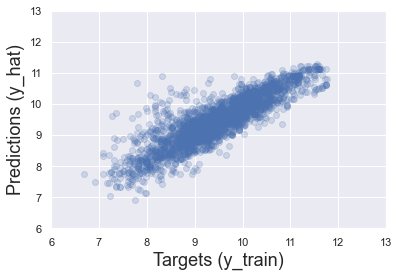

In [49]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.xlabel('Targets (y_train)',size =18)
plt.ylabel('Predictions (y_hat)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

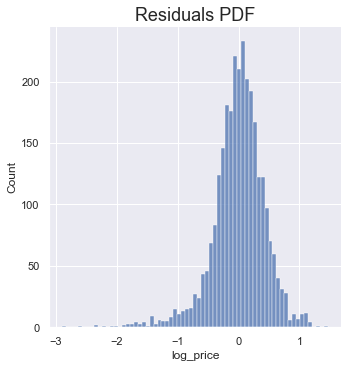

In [50]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF",size=18)

In [51]:
reg.score(x_train,y_train)

0.7510953257790927

### Finding the weights and bias

In [56]:
bias = reg.intercept_
bias

9.417778313978744

In [57]:
weights = reg.coef_
weights

array([-4.53363078e-01,  2.09779564e-01, -8.43480936e-05,  3.69454123e-03,
       -1.45316558e-01, -1.90190709e-01, -6.98000729e-02, -9.93057164e-02,
       -1.46073858e-01, -1.01423501e-01, -2.04317808e-01, -1.24421210e-01,
       -1.67833714e-01, -1.20298267e-01, -3.81915913e-02, -1.50948089e-01,
        3.20338368e-01])

In [61]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.453363
1,EngineV,0.209780
2,Brand_BMW,-0.000084
3,Brand_Mercedes-Benz,0.003695
4,Brand_Mitsubishi,-0.145317
5,Brand_Renault,-0.190191
6,Brand_Toyota,-0.069800
7,Brand_Volkswagen,-0.099306
8,Body_hatch,-0.146074
9,Body_other,-0.101424


### Testing

In [62]:
y_hat_test = reg.predict(x_test)

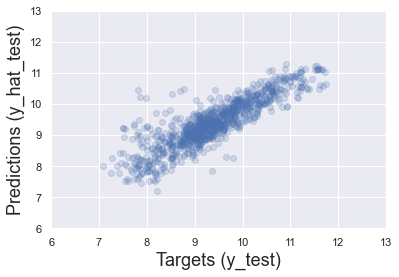

In [63]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size =18)
plt.ylabel('Predictions (y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Checking how good our predictions are

In [71]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target']-df_pf['Predictions']
df_pf['Differences%'] = np.abs(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Predictions,Target,Residual,Differences%
0,10621.402885,2300.0,-8321.402885,361.800125
1,3488.922616,2800.0,-688.922616,24.604379
2,7435.882969,2500.0,-4935.882969,197.435319
3,7451.301912,6400.0,-1051.301912,16.426592
4,11297.551202,9150.0,-2147.551202,23.470505


In [72]:
df_pf.describe()

,Predictions,Target,Residual,Differences%
count,967.000000,967.000000,967.000000,967.000000
mean,15907.691152,17841.522058,1933.830906,39.127293
std,13176.437849,19416.925011,10439.577250,77.720883
min,1342.075670,1200.000000,-31973.490888,0.051031
25%,7379.062823,6900.000000,-2100.400202,11.008249
50%,11648.375363,11400.000000,75.941471,23.651479
75%,19992.126685,20200.000000,3123.400952,40.219372
max,80307.758746,126000.000000,84782.220147,1278.939636


In [76]:
df_pf.sort_values(by=['Differences%'])

,Predictions,Target,Residual,Differences%
698,30515.564481,30500.0,-15.564481,0.051031
907,3803.046041,3800.0,-3.046041,0.080159
549,3754.358589,3750.0,-4.358589,0.116229
272,9815.964442,9800.0,-15.964442,0.162902
883,36067.407956,36000.0,-67.407956,0.187244
...,...,...,...,...
532,10039.558134,1800.0,-8239.558134,457.753230
639,30626.785189,4999.0,-25627.785189,512.658235
809,26486.966774,2900.0,-23586.966774,813.343682
959,27564.819883,2600.0,-24964.819883,960.185380
